#### 1. Business Problem 

##### 1.1 Description 

*  the startup is required to tabulate all drugs that they have sold and account
for each drug's effectiveness. 
* features as the input. Also, use the input to predict the base score of a certain drug in a provided
case.



#### 2. Machine Learning Probelm

##### 2.1 Type of Machine Leaning Problem 
* Regression problem to predict the base score

##### 2.2 Performance Metric 
* <b>RMSE</b>
* MSE


##### References:
* https://machinelearningmastery.com/regression-metrics-for-machine-learning/
*https://akhilendra.com/evaluation-metrics-regression-mae-mse-rmse-rmsle/#:~:text=MSE%20is%20highly%20biased%20for,lower%20residual%20values%20are%20preferred.
*https://www.statology.org/mse-vs-rmse/#:~:text=RMSE%20vs.,units%20of%20the%20response%20variable.



#### 3. Loading Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/My Drive/916e0d48-7-dataset.zip"

Archive:  /content/drive/My Drive/916e0d48-7-dataset.zip
   creating: dataset/
  inflating: dataset/test.csv        
  inflating: dataset/train.csv       


In [3]:
import pandas as pd

df_train =pd.read_csv("dataset/train.csv")
df_test=pd.read_csv("dataset/test.csv")
df_train.head(10)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782
5,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,5.691792
6,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,9-Mar-17,54,8.563274
7,219869,Amitriptyline,ibromyalgia,"""I&#039;ve been taking amitriptyline since Jan...",9,15-Mar-17,39,7.301039
8,212077,Lamotrigine,Bipolar Disorde,"""I&#039;ve been on every medicine under the su...",10,9-Nov-14,18,6.633970
9,12372,Atripla,HIV Infection,"""Spring of 2008 I was hospitalized with pnuemo...",8,9-Jul-10,11,6.562116


##### Observations:

##### Input features:
* Numeric columns : 2 (patient_id,number_of_times_prescribed)
* Categorical/text columns: 3 (name_of_drug,review_by_patient,use_case_for_drug)
* Date column: 1 (drug_approved_by_UIC)

##### Target Column : effectiveness_rating


#### 4. EDA

##### Checking the distribution of Target column by using binnig method

In [4]:
#checking whether all the data points have unique value of target value or not? and checking if there is any overlap/pattern
print("Unique values count of target column is : ",df_train.base_score.unique().shape[0])
print("minimum and maximum base_score of train data are : ",df_train['base_score'].min(),df_train['base_score'].max())
print("train data shape is :",df_train.shape)

Unique values count of target column is :  1383
minimum and maximum base_score of train data are :  0.899075571349414 8.992453031347313
train data shape is : (32165, 8)


In [5]:
df_train.describe()

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000,32165.000000
mean,115487.511052,6.998912,27.893207,6.664261
std,67146.156602,3.274781,35.819035,1.588699
min,9.000000,1.000000,0.000000,0.899076
25%,56922.000000,5.000000,6.000000,6.109307
50%,115776.000000,8.000000,16.000000,6.788245
75%,173562.000000,10.000000,36.000000,7.900790
max,232289.000000,10.000000,771.000000,8.992453


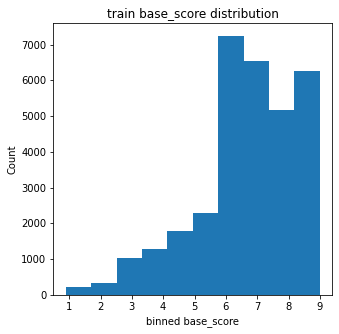

In [6]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html  ->> histogram 
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.hist(df_train['base_score'],bins=10) #bin size is choosed based on min and max value
plt.xlabel("binned base_score")
plt.ylabel("Count")
plt.title("train base_score distribution")
plt.show()

In [7]:
print("total distinct use_case of drug in train are: ",df_train["use_case_for_drug"].unique().shape[0])
print("total distinct drugs used in train are: ",df_train["name_of_drug"].unique().shape[0])
print("="*50)
print("total distinct use_case of drug in test data  are: ",df_test["use_case_for_drug"].unique().shape[0])
print("total distinct drugs used in test data are: ",df_test["name_of_drug"].unique().shape[0])

#check point:
# distinct values in test data for "use_case_for_drug" & "name_of_drug" are less than equals to train data

total distinct use_case of drug in train are:  636
total distinct drugs used in train are:  2220
total distinct use_case of drug in test data  are:  461
total distinct drugs used in test data are:  1478


In [8]:
#checking the null column in train/test data
print("Finding the null fields if any present in train data:  ",df_train.columns[df_train.isnull().any()])
print("Finding the null fields if any present in test data:  ",df_test.columns[df_test.isnull().any()])

#Observations:
# no null fields are present for any of the columns in train/test

Finding the null fields if any present in train data:   Index([], dtype='object')
Finding the null fields if any present in test data:   Index([], dtype='object')


In [9]:
#duplicate record check in the data based on primary_key columns
#https://stackoverflow.com/questions/35584085/how-to-count-duplicate-rows-in-pandas-dataframe  -->> using group by expression
print("distinct records based on patient_id columns is :",df_train.groupby(by="patient_id").size().count())
print("Duplicate record count is :",df_train.groupby(by="patient_id").size().count()-df_train.shape[0])

distinct records based on patient_id columns is : 32165
Duplicate record count is : 0


#### 5. Data Preprocessing

In [10]:
#https://www.w3schools.com/python/python_regex.asp --> regex function check
#name_of_drug can have more than one drug specified so / is kept also text is lower cased and removed extra space and joined with _
import regex as re
df_train["name_of_drug"]=df_train["name_of_drug"].apply(lambda x: re.sub('[^A-Za-z0-9\/]+', ' ',x)) #returns match excluding text and number ^ method
df_train["name_of_drug"]=df_train["name_of_drug"].apply(lambda x: x.lower().replace(" / ","/").replace(" ","_"))


#test data
df_test["name_of_drug"]=df_test["name_of_drug"].apply(lambda x: re.sub('[^A-Za-z0-9\/]+', ' ',x)) #returns match excluding text and number ^ method
df_test["name_of_drug"]=df_test["name_of_drug"].apply(lambda x: x.lower().replace(" / ","/").replace(" ","_"))


In [11]:
# list(filter(lambda x: '</span>' in x ,df_train["use_case_for_drug"]))
a=list(map(lambda x: True if '</span>' in x else False ,df_train["use_case_for_drug"]))
print("No of records having <span> informations for use_case_for_drug are : ",len(df_train[a]))
df_train[a][:5]

#Observations:
# It seems no redundant data exist with </span> key word with other columns so records can be retained however use case of this type is not much expainatory

No of records having <span> informations for use_case_for_drug are :  179


,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
51,67383,provera,4</span> users found this comment helpful.,"""I&#039;m 24 years old and have always had a p...",1,27-Mar-16,4,6.548256
300,168137,jolessa,2</span> users found this comment helpful.,"""I started Jolessa 6 months ago. The first pac...",3,9-Nov-10,2,8.309529
357,157314,latisse,8</span> users found this comment helpful.,"""Lashes are much longer and fuller. No side ef...",10,15-Jan-12,8,7.737593
495,182965,cymbalta,4</span> users found this comment helpful.,"""I suffer from PTSD and the associated issues ...",8,3-Nov-15,4,7.493870
665,80623,mobic,94</span> users found this comment helpful.,"""I have been having severe hip pain for over 9...",8,18-May-08,94,4.884212


In [12]:
#https://www.w3schools.com/python/python_regex.asp
# x="28</span> users found this comment helpful. Diabetes, Type 2.)"
# print(re.sub('(</span>)|[\),.&#]','',x))

df_train["use_case_for_drug"]=df_train["use_case_for_drug"].apply(lambda x: re.sub('(</span>)|[\),.\'\(]','',x))
df_train["use_case_for_drug"]=df_train["use_case_for_drug"].apply(lambda x: x.lower().replace(" / ","/").replace(" ","_"))

#test data
df_test["use_case_for_drug"]=df_test["use_case_for_drug"].apply(lambda x: re.sub('(</span>)|[\),.\'\(]','',x))
df_test["use_case_for_drug"]=df_test["use_case_for_drug"].apply(lambda x: x.lower().replace(" / ","/").replace(" ","_"))


##### Preprocessing of review_by_patient

In [13]:
# from the review_by_patient data
# Below are the observations from the data lookup
# &#039; -->> can be completely removed and replace it with '(apostrophe)

In [14]:
#https://stackoverflow.com/questions/14596884/remove-text-between-and  -->> reference
x="""I&#039;ve been taking amitriptyline since January 2013 after being diagnosed with fibromyalgia. I tried cymbalta for a week and my Dr decided that since it kept me awake 24/7 that it wasn&#039;t a good fit for me even though it relieved my pain. I started with 25 mg. After 2 weeks I had some breakthrough pain, so my Dr increased my dosage to 50mg and I&#039;m still on that dosage today. For the first full year I was on this I never had pain and felt &#039;cured&#039;. As time went on, it seems to help control my pain. I do still have pain, but at a low manageable level.I take this around 7pm (each evening to avoid) feeling overly drowsy in the mornings. This med allows me to have a fairly normal life."""
a=re.sub('(&#039;)','\'',x)
print(a)
print("="*50)
a=re.sub('\((.*)\)',"",a) #. -->> any char and * 0/ more char
a=a.replace("\'ve"," have") #need to remove similar short to full length
a=re.sub('[^A-Za-z0-9]+'," ",a) #remove all the char expect alpha numeric
print(a)


I've been taking amitriptyline since January 2013 after being diagnosed with fibromyalgia. I tried cymbalta for a week and my Dr decided that since it kept me awake 24/7 that it wasn't a good fit for me even though it relieved my pain. I started with 25 mg. After 2 weeks I had some breakthrough pain, so my Dr increased my dosage to 50mg and I'm still on that dosage today. For the first full year I was on this I never had pain and felt 'cured'. As time went on, it seems to help control my pain. I do still have pain, but at a low manageable level.I take this around 7pm (each evening to avoid) feeling overly drowsy in the mornings. This med allows me to have a fairly normal life.
I have been taking amitriptyline since January 2013 after being diagnosed with fibromyalgia I tried cymbalta for a week and my Dr decided that since it kept me awake 24 7 that it wasn t a good fit for me even though it relieved my pain I started with 25 mg After 2 weeks I had some breakthrough pain so my Dr incre

In [15]:
## https://stackoverflow.com/a/47091490/4084039   -->> reference
def decontracted(phrase):
    phrase = re.sub(r"aren't", "are not", phrase)
    phrase = re.sub(r"weren't", "are not", phrase)
    phrase = re.sub(r"haven't", "have not", phrase)
    phrase = re.sub(r"can't", "can not", phrase)
    phrase = re.sub(r"didn't", "did not", phrase)
    phrase = re.sub(r"don't", "do not", phrase)
    phrase = re.sub(r"couldn't", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

#check
x="I am't hungry now but we aren't supposed to go outside. where're you now and send me the location to so that we can't go for dinner"

decontracted(x)

'I am not hungry now but we are not supposed to go outside. where are you now and send me the location to so that we can not go for dinner'

In [16]:
#stopwords are collected and removed "not" from the set as it is meaningful 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
stopwords={'a','about','above','after','again','against','ain','all','am','an','and','any',\
 'are','aren',"aren't",'as','at','be','because','been','before','being','below','between','both',\
 'but','by','can','couldn',"couldn't",'d','did','didn',"didn't",'do','does','doesn',"doesn't",'doing',\
 'don',"don't",'down','during','each','few','for','from','further','had','hadn',"hadn't",'has','hasn',\
 "hasn't",'have','haven',"haven't",'having','he','her','here','hers','herself','him','himself','his',\
 'how','i','if','in','into','is','isn',"isn't",'it',"it's",'its','itself','just','ll','m','ma','me','mightn',\
 "mightn't",'more','most','mustn',"mustn't",'my','myself','needn',"needn't",'no','nor','now','o','of',\
 'off','on','once','only','or','other','our','ours','ourselves','out','over','own','re','s','same','shan',"shan't",\
 'she',"she's",'should',"should've",'shouldn',"shouldn't",'so','some','such','t','than','that',"that'll",'the',\
 'their','theirs','them','themselves','then','there','these','they','this','those','through','to','too',\
 'under','until','up','ve','very','was','wasn',"wasn't",'we','were','weren',"weren't",'what','when',\
 'where','which','while','who','whom','why','will','with','won',"won't",'wouldn',"wouldn't",'y','you',\
 "you'd","you'll","you're","you've",'your','yours','yourself','yourselves'} #,'not' is removed

In [18]:
#sample data check
from tqdm.notebook import tqdm
for i in tqdm(df_train["review_by_patient"][:2].values):
  i=re.sub('(&#039;)','\'',i)
  i=re.sub('\((.*)\)',"",i) #. -->> any char and * 0/ more char
  i=decontracted(i)
  i=re.sub('[^A-Za-z0-9]+'," ",i)
  i=i.lower().strip() #lower case conversion
  i= ' '.join(e for e in i.split() if e not in stopwords) #removing stopwords from sentence
  print(i)


  0%|          | 0/2 [00:00<?, ?it/s]

side effect take combination bystolic 5 mg fish oil
son halfway fourth week intuniv became concerned began last week started taking highest dose two days could hardly get bed cranky slept nearly 8 hours drive home school vacation less cranky remembering things overall behavior better tried many different medications far effective


In [19]:
def text_preprocessing(df):
  preprocessed_reviews=[]
  for i in tqdm(df.values):
    i=re.sub('(&#039;)','\'',i)
    i=re.sub('\((.*)\)',"",i) #. -->> any char and * 0/ more char
    i=decontracted(i)
    i=re.sub('[^A-Za-z0-9]+'," ",i)
    i=i.lower().strip() #lower case conversion and removing trailing spaces
    i= ' '.join(e for e in i.split() if e not in stopwords) #removing stopwords from sentence
    preprocessed_reviews.append(i)
  return preprocessed_reviews


In [20]:
#train data
df_train['review_by_patient']=text_preprocessing(df_train['review_by_patient'])

#test_data
df_test['review_by_patient']=text_preprocessing(df_test['review_by_patient'])

  0%|          | 0/32165 [00:00<?, ?it/s]

  0%|          | 0/10760 [00:00<?, ?it/s]

##### Date Conversion

In [21]:
# we can not use date directly so it needs to seperated as date,month and year
#method 1: split by "-"
month_dict={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

def date_con(df):
  date=[]
  month=[]
  year=[]
  for i in df:
    date1,month1,year1=i.split("-")
    month.append(month_dict[month1])
    date.append(int(date1))
    year.append(int('20'+ year1))
  return date,month,year

In [22]:
#storing in train_data
df_train["date"],df_train["month"],df_train["year"]= date_con(df_train["drug_approved_by_UIC"])

#storing in test_data
df_test["date"],df_test["month"],df_test["year"]= date_con(df_test["drug_approved_by_UIC"])

In [23]:
df_tr=df_train.drop(['drug_approved_by_UIC'], axis=1)
df_te=df_test.drop(['drug_approved_by_UIC'], axis=1)

In [24]:
df_tr.head(3)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,number_of_times_prescribed,base_score,date,month,year
0,206461,valsartan,left_ventricular_dysfunction,side effect take combination bystolic 5 mg fis...,9,27,8.022969,20,5,2012
1,95260,guanfacine,adhd,son halfway fourth week intuniv became concern...,8,192,7.858458,27,4,2010
2,92703,lybrel,birth_control,used take another oral contraceptive 21 pill c...,5,17,6.341969,14,12,2009


In [25]:
df_te.head(3)

,patient_id,name_of_drug,review_by_patient,number_of_times_prescribed,use_case_for_drug,effectiveness_rating,date,month,year
0,163740,mirtazapine,tried antidepressants years none helped depres...,22,depression,10,28,2,2012
1,39293,contrave,contrave combines drugs used alcohol smoking o...,35,weight_loss,9,5,3,2017
2,208087,zyclara,4 days first 2 weeks using arms face put vasel...,13,keratosis,4,3,7,2014


#### 6. Featurization/Vectorization

In [ ]:
#name_of_drug,review_by_patient,use_case_for_drug  -->> needs to be vectorized
# methods: BOW, TFIDF, AvgW2V
#We can use pre trained model from https://tfhub.dev/google/experts/bert/pubmed/squad2/2 

In [26]:
#https://machinelearningmastery.com/develop-word-embeddings-python-gensim/ --> reference for W2V
!pip install --upgrade gensim

from gensim.models import Word2Vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [27]:
split_reviews_train=[]
for i in df_train['review_by_patient']:
  split_reviews_train.append(i.split(" "))

In [28]:
%%time
model = Word2Vec(split_reviews_train, min_count=2,vector_size=100,window=5) #parameters are choosed default only min_count is kept to 2 to hold more vocab
print(model)

Word2Vec<vocab=16108, vector_size=100, alpha=0.025>
CPU times: user 21.5 s, sys: 2.53 ms, total: 21.5 s
Wall time: 15.4 s


In [29]:
#https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4 -->> to get the vocab words
print("Count of unique words from the vectorized reviews are :",len(list(model.wv.key_to_index)))
print("Checking the most similar words to 'bystolic'\n",model.wv.most_similar("bystolic"))

Count of unique words from the vectorized reviews are : 16108
Checking the most similar words to 'bystolic'
 [('amlodipine', 0.8613930940628052), ('losartan', 0.8611012697219849), ('metoprolol', 0.8462236523628235), ('atenolol', 0.8318247199058533), ('lisinopril', 0.831503689289093), ('dilantin', 0.8217875361442566), ('zocor', 0.8194802403450012), ('haldol', 0.819029688835144), ('levothyroxine', 0.816926121711731), ('toujeo', 0.8147931694984436)]


In [30]:
model.save('model_review_by_patient.bin') #saving in binary format

In [ ]:
#avgw2v model folenr train data
%%time
# review_vector=[]
# c=0
# for senetence_split in tqdm(split_reviews_train):
#   c=c+1
#   word_vec = np.zeros(100)
#   count=0 
#   for word in senetence_split:
#     if word in list(model.wv.key_to_index) and word!=' ':
#        word_vec=word_vec+ model.wv.get_vector(word)
#        count+=1
#   if count>0:
#     sent_vec=word_vec/count
#     review_vector.append(sent_vec)
#   else:
#     review_vector.append(word_vec)
#     print(c)

  0%|          | 0/32165 [00:00<?, ?it/s]

2851
12509
CPU times: user 12min 10s, sys: 21.3 s, total: 12min 32s
Wall time: 12min 19s


In [ ]:
# there are 2 records for which dictionary word is not find
df_train["review_by_patient"][[2850,12508]]

#exellent and annetandre9 are not present in dictionary so can be avoided

2850        exellent
12508    annetandre9
Name: review_by_patient, dtype: object

In [ ]:
# import pickle
# with open("/content/drive/My Drive/review_vector", "wb") as fp:   
#     pickle.dump(review_vector, fp)

In [31]:
import pickle
with open("/content/drive/My Drive/review_vector", "rb") as fp:   # Unpickling
  review_vector1 = pickle.load(fp)

In [32]:
review_vector_train=[]
for i in range(np.array(review_vector1).shape[1]):
  review_vector_train.append("review"+str(i))

review_df=pd.DataFrame(np.array(review_vector1),columns=review_vector_train)

In [ ]:
#here we will use the train key words 

%%time
# split_reviews_test=[]
# for i in df_test['review_by_patient']:
#   split_reviews_test.append(i.split(" "))


# review_vector_test=[]
# for senetence_split in tqdm(split_reviews_test):
#   word_vec = np.zeros(100)
#   count=0 
#   for word in senetence_split:
#     if word in list(model.wv.key_to_index): #checking test word in trained w2v keys else skips it
#        word_vec=word_vec+ model.wv.get_vector(word)
#        count+=1
#   sent_vec=word_vec/count
#   review_vector_test.append(sent_vec)

  0%|          | 0/10760 [00:00<?, ?it/s]

In [ ]:
# import pickle
# with open("/content/drive/My Drive/review_vector_test", "wb") as fpt:   
#     pickle.dump(review_vector_test, fpt)

In [33]:
import pickle
with open("/content/drive/My Drive/review_vector_test", "rb") as fpt:   # Unpickling
  review_vector_test1 = pickle.load(fpt)

#test dataframe
review_df_test=pd.DataFrame(np.array(review_vector_test1),columns=review_vector_train)

##### OHE of name_of_drug	and use_case_for_drug	

In [34]:
#name_of_drug	use_case_for_drug	
#since use_case_for_drug column is having only 636 unique values so it can OHE
#df_train["use_case_for_drug"].unique().size

#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html  -->> reference
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_train["use_case_for_drug"].values.reshape(-1,1))
df_train_encoded=enc.transform(df_train["use_case_for_drug"].values.reshape(-1,1)).toarray()


#test_data -->> transform only
df_test_encoded=enc.transform(df_test["use_case_for_drug"].values.reshape(-1,1)).toarray()

In [35]:
use_case_for_drug_col=[]
for i in range(df_train_encoded.shape[1]):
  use_case_for_drug_col.append("use_case_for_drug"+str(i))

#converting to dataframe for column naming
use_case_for_drug=pd.DataFrame(df_train_encoded,columns=use_case_for_drug_col)

#test data
use_case_for_drug_test=pd.DataFrame(df_test_encoded,columns=use_case_for_drug_col)

In [36]:
print("encoded shape of train and test for use_case_for_drug column are :\n",df_train_encoded.shape,"\n",df_test_encoded.shape)

encoded shape of train and test for use_case_for_drug column are :
 (32165, 636) 
 (10760, 636)


In [37]:
#name_of_drug

from sklearn.preprocessing import OneHotEncoder
enc1 = OneHotEncoder(handle_unknown='ignore')
enc1.fit(df_train["name_of_drug"].values.reshape(-1,1))
df_train_encoded1=enc1.transform(df_train["name_of_drug"].values.reshape(-1,1)).toarray()


#test_data -->> transform only
df_test_encoded1=enc1.transform(df_test["name_of_drug"].values.reshape(-1,1)).toarray()

In [38]:
name_of_drug_col=[]
for i in range(df_train_encoded1.shape[1]):
  name_of_drug_col.append("name_of_drug_"+str(i))

name_of_drug=pd.DataFrame(df_train_encoded1,columns=name_of_drug_col)
#test data
name_of_drug_test=pd.DataFrame(df_test_encoded1,columns=name_of_drug_col)

In [39]:
print("encoded shape of train and test for name_of_drug column are :\n",df_train_encoded1.shape,"\n",df_test_encoded1.shape)

encoded shape of train and test for name_of_drug column are :
 (32165, 2220) 
 (10760, 2220)


##### standardizing the number_of_times_prescribed and effectiveness_rating 
* standardizing the number_of_times_prescribed and effectiveness_rating columns as the range values are high compared to other columns so it is good to standardize to bring into standard scale

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df_tr.loc[:,["effectiveness_rating","number_of_times_prescribed"]])

scaled_test=scaler.transform(df_te.loc[:,["effectiveness_rating","number_of_times_prescribed"]]) #only transform is used for test data

In [41]:
std_rating_pres=pd.DataFrame(scaled,columns=["effectiveness_rating","number_of_times_prescribed"])
std_rating_pres_test=pd.DataFrame(scaled_test,columns=["effectiveness_rating","number_of_times_prescribed"])

##### Concatenating

In [42]:
y=df_tr["base_score"]

In [43]:
df_tr=df_tr.drop(["name_of_drug","use_case_for_drug","review_by_patient","base_score","effectiveness_rating","number_of_times_prescribed"],axis=1)
df_te=df_te.drop(["name_of_drug","use_case_for_drug","review_by_patient","effectiveness_rating","number_of_times_prescribed"],axis=1)

In [44]:
df_tr1=pd.concat([df_tr,std_rating_pres,name_of_drug,use_case_for_drug,review_df],axis=1)
df_te1=pd.concat([df_te,std_rating_pres_test,name_of_drug_test,use_case_for_drug_test,review_df_test],axis=1)
print("Shape of train data: ",df_tr1.shape)
print("Shape of train data: ",df_te1.shape)
df_tr1.head()

Shape of train data:  (32165, 2962)
Shape of train data:  (10760, 2962)


,patient_id,date,month,year,effectiveness_rating,number_of_times_prescribed,name_of_drug_0,name_of_drug_1,name_of_drug_2,name_of_drug_3,...,review90,review91,review92,review93,review94,review95,review96,review97,review98,review99
0,206461,20,5,2012,0.611070,-0.024937,0.0,0.0,0.0,0.0,...,1.225603,0.072958,0.209666,0.408447,0.571413,0.186995,-0.400549,0.260937,-0.132575,-0.959135
1,95260,27,4,2010,0.305701,4.581624,0.0,0.0,0.0,0.0,...,0.915853,0.678801,-0.140437,0.191051,0.189241,0.363503,-0.424754,0.490442,-0.195897,-0.191871
2,92703,14,12,2009,-0.610405,-0.304123,0.0,0.0,0.0,0.0,...,0.895155,0.639460,-0.177698,0.167317,0.244101,0.136266,-0.659518,0.434085,-0.428383,-0.543554
3,35696,27,11,2016,0.611070,0.254248,0.0,0.0,0.0,0.0,...,0.489203,0.376118,0.101293,0.149794,0.158074,0.206090,-0.105666,0.220976,0.266518,-0.236672
4,155963,28,11,2015,-1.526511,0.421760,0.0,0.0,0.0,0.0,...,1.008379,0.260281,0.132618,0.241613,0.386429,0.059607,-0.231880,0.257678,-0.212199,-0.474229


* Patient_id is unique column so we need to drop it as it does not add any value

In [45]:
#drop patient_id column
df_tr1=df_tr1.drop(["patient_id"],axis=1)
df_te1=df_te1.drop(["patient_id"],axis=1)

In [ ]:
# df_tr1["effectiveness_rating"]=df_train["effectiveness_rating"]
# df_tr1["number_of_times_prescribed"]=df_train["number_of_times_prescribed"]

In [46]:
#no null value detected
df_tr1.columns[df_tr1.isnull().any()]

Index([], dtype='object')

#### 7. Modeling

##### Data Splitting

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(df_tr1, y, test_size=0.20,random_state=42)

In [48]:
print("Shape of train data is : ",X_train.shape,y_train.shape)
print("Shape of cv data is : ",X_cv.shape,y_cv.shape)

Shape of train data is :  (25732, 2961) (25732,)
Shape of cv data is :  (6433, 2961) (6433,)


##### Model-1: Linear Regression (Base Model)

In [49]:
#https://stackoverflow.com/questions/48033510/tuning-parameters-for-svm-regression  -->> choosing parameters
# Here we will apply K-Fol cross validation for thorough learning of training data set where we can avaoid the splitting of train data 
#https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python  -->> rmse 
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error


In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred_train = regressor.predict(X_train)
y_pred_cv = regressor.predict(X_cv)

In [ ]:
from sklearn.metrics import mean_squared_error
print("train RSME score is : ",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("CV RSME score is : ",np.sqrt(mean_squared_error(y_cv,y_pred_cv)))

train RSME score is :  1.365623162764045
CV RSME score is :  4763872360.879542


##### Observations:
* Patient_id addition was improving the CV RMSE score but does not make sense giving information on base_score so it is removed.
* Linear regression is not performing well. So we will check the feature importance

In [ ]:
# extracting important features and fitting model on the important features only
importance = regressor.coef_
dict1=dict()
for i,v in zip(df_tr1.columns,importance):
	dict1[i]=v
top_features=sorted(dict1.items(),key=lambda x : x[1],reverse=True)[:5]
top_feature_names=[]
for i in top_features:
  top_feature_names.append(i[0])
top_features

[('use_case_for_drug292', 77632320755.32895),
 ('use_case_for_drug488', 77632320752.27818),
 ('name_of_drug_35', 72799247182.8797),
 ('name_of_drug_89', 30141843651.560013),
 ('name_of_drug_56', 29866189189.362946)]

In [ ]:
# fitting the linear regresion on top 10 features only
regressor1 = LinearRegression()
regressor1.fit(X_train.loc[:,top_feature_names],y_train)
y_pred_train = regressor1.predict(X_train.loc[:,top_feature_names])
y_pred_cv = regressor1.predict(X_cv.loc[:,top_feature_names])

In [ ]:
from sklearn.metrics import mean_squared_error
print("train RSME score is : ",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("CV RSME score is : ",np.sqrt(mean_squared_error(y_cv,y_pred_cv)))

train RSME score is :  1.5876590687968648
CV RSME score is :  1.591721407356096


##### Observation:
* With top 5 features from previously trained model is giving sensible CV RMSE score

##### Model-2: DecisionTree Regressor


In [ ]:
from sklearn.tree import DecisionTreeRegressor
params = {
         'max_depth': [4, 5, 10, 20, 50],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
    }

model_dec = DecisionTreeRegressor()
dt_random = RandomizedSearchCV(estimator = model_dec, param_distributions = params,scoring="neg_root_mean_squared_error",verbose=2,n_jobs = -1)
dt_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [4, 5, 10, 20, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
#best fitted estimator
dt_random.best_estimator_

DecisionTreeRegressor(max_depth=50, min_samples_leaf=4)

In [ ]:
model_dec_best = DecisionTreeRegressor(max_depth=50, min_samples_split=5)
model_dec_best.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=50, min_samples_split=5)

In [ ]:
predict_val_train=model_dec_best.predict(X_train)
predict_val_test=model_dec_best.predict(X_cv)
from sklearn.metrics import mean_squared_error
print("train RSME score is : ",np.sqrt(mean_squared_error(y_train,predict_val_train)))
print("CV RSME score is : ",np.sqrt(mean_squared_error(y_cv,predict_val_test)))

train RSME score is :  0.04846060388523457
CV RSME score is :  0.399612025791325


##### Observations:
* CV RMSE = 0.414 is achieved and model looks slightly overfitted

In [ ]:
importance = model_dec_best.feature_importances_
dict_imp=dict()
for i ,v in zip(X_train.columns,importance):
  dict_imp[i]=v

In [ ]:
top_features_decision=sorted(dict_imp.items(),key=lambda x : x[1],reverse=True)
top_feature_dec_names=[]
for i in top_features_decision:
  top_feature_dec_names.append(i[0])


In [ ]:
# import pickle
# with open ('/content/drive/My Drive/important_columns_dict', 'wb') as fp:
#     pickle.dump(top_features_decision,fp)

In [ ]:
import pickle
with open("/content/drive/My Drive/important_columns_dict", "rb") as fpt:   # Unpickling
  top_features_decision1 = pickle.load(fpt)

In [ ]:
top_features_decision1[:10]

[('number_of_times_prescribed', 0.48670667228618064),
 ('effectiveness_rating', 0.4826423900078413),
 ('review40', 0.0010227994645899288),
 ('review1', 0.0008996496587341599),
 ('review79', 0.0007767493657148787),
 ('review98', 0.0007687755453634477),
 ('review68', 0.0007370167398343165),
 ('review83', 0.0007189738168136586),
 ('review64', 0.0006504443365230672),
 ('review48', 0.0006012010667372923)]

##### Observations:
* We observe number_of_times_prescribed and effectiveness_rating are contributing the most to fit the line of base_score
* So for the next ensemble models, we will choose the top/most importanat features obtained here
*name_of_drug is not contributing at all so it can be fairly dropped from the feature list

##### XGBRegressor

In [50]:
name_of_drug.columns
#dropping the name_of_drug columns from the dataset
X_train1=X_train.drop(name_of_drug.columns,axis=1)
X_cv1=X_cv.drop(name_of_drug.columns,axis=1)

In [51]:
print("Shape of train data",X_train1.shape,y_train.shape)
print("Shape of cv data",X_cv1.shape,y_cv.shape)

Shape of train data (25732, 741) (25732,)
Shape of cv data (6433, 741) (6433,)


In [52]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import time
from datetime import datetime

In [ ]:
params = {
         'max_depth': [4, 5, 10],
         'learning_rate': [0.2,0.25,0.3,0.5],
         'min_samples_split': [2, 5, 10],
         'n_estimators':[500, 1000]
    }
model_xgb = XGBRegressor()
xgb_random = RandomizedSearchCV(estimator = model_xgb, param_distributions = params,cv=3,scoring="neg_root_mean_squared_error",verbose=2,n_jobs = -1)
xgb_random.fit(X_train1, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[21:29:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, estimator=XGBRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.2, 0.25, 0.3, 0.5],
                                        'max_depth': [4, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [500, 1000]},
                   scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
#best fitted estimator
xgb_random.best_estimator_

XGBRegressor(learning_rate=0.2, max_depth=5, min_samples_split=10,
             n_estimators=1000)

In [53]:
model_xgb_best = XGBRegressor(learning_rate=0.2, max_depth=5, min_samples_split=10,n_estimators=1000)
model_xgb_best.fit(X_train1, y_train)

[03:14:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.2, max_depth=5, min_samples_split=10,
             n_estimators=1000)

In [54]:
from sklearn.metrics import mean_squared_error
y_pred_train = model_xgb_best.predict(X_train1)
y_pred_test = model_xgb_best.predict(X_cv1)
print("Train RSME score is : ",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("CV RSME score is : ",np.sqrt(mean_squared_error(y_cv,y_pred_test)))

Train RSME score is :  0.021967718541420243
CV RSME score is :  0.14958817974950137


In [56]:
important_features_xgb=model_xgb_best.feature_importances_
dict_imp_xgb=dict()
for i ,v in zip(X_train1.columns,important_features_xgb):
  dict_imp_xgb[i]=v

In [58]:
top_features_xgb=sorted(dict_imp_xgb.items(),key=lambda x : x[1],reverse=True)
top_feature_xgb_names=[]
for i in top_features_xgb:
  top_feature_xgb_names.append(i[0])

In [59]:
top_features_xgb[:10]

[('effectiveness_rating', 0.48313814),
 ('number_of_times_prescribed', 0.27753368),
 ('use_case_for_drug548', 0.035780057),
 ('use_case_for_drug287', 0.012286107),
 ('review96', 0.008513649),
 ('use_case_for_drug334', 0.0054128254),
 ('review48', 0.005378629),
 ('review37', 0.003692643),
 ('review90', 0.0025524325),
 ('review65', 0.0025435404)]

* Checking the model with only top 2 features

In [69]:
model_xgb_best1 = XGBRegressor(learning_rate=0.2, max_depth=5, min_samples_split=10,n_estimators=1000)
model_xgb_best1.fit(X_train1.loc[:,top_feature_xgb_names[:2]], y_train)

[04:07:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.2, max_depth=5, min_samples_split=10,
             n_estimators=1000)

In [70]:
from sklearn.metrics import mean_squared_error
y_pred_train1 = model_xgb_best1.predict(X_train1.loc[:,top_feature_xgb_names[:2]])
y_pred_test1 = model_xgb_best1.predict(X_cv1.loc[:,top_feature_xgb_names[:2]])
print("Train RSME score with only top features is : ",np.sqrt(mean_squared_error(y_train,y_pred_train1)))
print("CV RSME score with only top features is : ",np.sqrt(mean_squared_error(y_cv,y_pred_test1)))

Train RSME score with only top features is :  0.006549431729782531
CV RSME score with only top features is :  0.06507549025787276


##### Observations:
* 'effectiveness_rating','number_of_times_prescribed' columns are contributing more to match the fitting line and use_case_of_drug and reviews are decreasing the model performance by creating noise.
* CV RMSE of 0.065 is achieved with XGBRegressor

##### LGBRegressor

In [73]:
import lightgbm as lgbm

In [101]:
#https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html  -->> parameters range
params = {					
'boosting_type':['dart','goss'],
'num_leaves':[31,50,70],
'n_estimators':[100,500,1000],
'learning_rate': [0.1,0.2,0.25,0.3],
'max_depth': [5,7,10,20],
'reg_alpha':[0.1,1,10,30]
		}
lgbm_reg = lgbm.LGBMRegressor()
lgbm_random = RandomizedSearchCV(estimator = lgbm_reg, param_distributions = params,cv=3,scoring="neg_root_mean_squared_error",verbose=2,n_jobs = -1)
lgbm_random.fit(X_train1, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'boosting_type': ['dart', 'goss'],
                                        'learning_rate': [0.1, 0.2, 0.25, 0.3],
                                        'max_depth': [5, 7, 10, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'num_leaves': [31, 50, 70],
                                        'reg_alpha': [0.1, 1, 10, 30]},
                   scoring='neg_root_mean_squared_error', verbose=2)

In [105]:
#best fitted estimator
lgbm_random.best_estimator_

LGBMRegressor(boosting_type='dart', learning_rate=0.3, max_depth=20,
              n_estimators=1000, num_leaves=50, reg_alpha=30)

In [126]:
model_lgbm_best = lgbm.LGBMRegressor(boosting_type='dart', learning_rate=0.23, max_depth=50,\
                                    n_estimators=2000, num_leaves=50)
model_lgbm_best.fit(X_train1, y_train)

LGBMRegressor(boosting_type='dart', learning_rate=0.23, max_depth=50,
              n_estimators=2000, num_leaves=50)

In [127]:
from sklearn.metrics import mean_squared_error
y_pred_train = model_lgbm_best.predict(X_train1)
y_pred_test = model_lgbm_best.predict(X_cv1)
print("Train RSME score is : ",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("CV RSME score is : ",np.sqrt(mean_squared_error(y_cv,y_pred_test)))

Train RSME score is :  0.0223533817641797
CV RSME score is :  0.1930867889967025


##### Observations:
* Achieved RMSE CV of 0.1930

In [128]:
important_feature_lgbm=model_lgbm_best.feature_importances_
dict_imp_lgbm=dict()
for i ,v in zip(X_train1.columns,important_feature_lgbm):
  dict_imp_lgbm[i]=v

In [148]:
top_features_lgbm=sorted(dict_imp_lgbm.items(),key=lambda x : x[1],reverse=True)
top_feature_lgbm_names=[]
for i in top_features_lgbm:
  top_feature_lgbm_names.append(i[0])

In [149]:
top_features_lgbm[:10] #values are in non-normalized state

[('number_of_times_prescribed', 74547),
 ('effectiveness_rating', 14545),
 ('review25', 140),
 ('review9', 131),
 ('review38', 131),
 ('review82', 131),
 ('review83', 128),
 ('review84', 123),
 ('review93', 123),
 ('review55', 121)]

In [152]:
print("number_of_times_prescribed column is contributing :",top_features_lgbm[0][1]/sum(dict_imp_lgbm.values()))
print("effectiveness_rating column is contributing :",top_features_lgbm[1][1]/sum(dict_imp_lgbm.values()))

#90% of regression line fitting is taken care by top 2 columns

number_of_times_prescribed column is contributing : 0.7606836734693877
effectiveness_rating column is contributing : 0.14841836734693878


* Checking the model Performance on top 2 features only

In [157]:
model_lgbm_best1 = lgbm.LGBMRegressor(boosting_type='dart', learning_rate=0.23, max_depth=50,\
                                    n_estimators=2000, num_leaves=60)
model_lgbm_best1.fit(X_train1.loc[:,top_feature_lgbm_names[:2]], y_train)

LGBMRegressor(boosting_type='dart', learning_rate=0.23, max_depth=50,
              n_estimators=2000, num_leaves=60)

In [158]:
y_pred_train = model_lgbm_best1.predict(X_train1.loc[:,top_feature_lgbm_names[:2]])
y_pred_test = model_lgbm_best1.predict(X_cv1.loc[:,top_feature_lgbm_names[:2]])
print("Train RSME score is : ",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("CV RSME score is : ",np.sqrt(mean_squared_error(y_cv,y_pred_test)))

Train RSME score is :  0.05178772896846917
CV RSME score is :  0.10270121047997222


##### Observations:
* Achieved RMSE CV of 0.1027 with top 2 attributes of the input data
* XGBRegressor is performing well on the data where we achieved 0.065 rmse score. So It can be cosidered for the final model testing

#### 8.Prediction on test_data using best model(XGB)

In [159]:
#preprocessed test dataframe
df_te1.head()

,date,month,year,effectiveness_rating,number_of_times_prescribed,name_of_drug_0,name_of_drug_1,name_of_drug_2,name_of_drug_3,name_of_drug_4,...,review90,review91,review92,review93,review94,review95,review96,review97,review98,review99
0,28,2,2012,0.916438,-0.164530,0.0,0.0,0.0,0.0,0.0,...,0.263215,0.578265,0.498486,0.353031,0.045113,0.539284,0.081384,0.520955,0.236085,-0.439861
1,5,3,2017,0.611070,0.198411,0.0,0.0,0.0,0.0,0.0,...,-0.022168,0.474219,0.466272,-0.002056,0.804194,0.553090,-0.707309,0.215267,-0.275539,-0.485945
2,3,7,2014,-0.915774,-0.415797,0.0,0.0,0.0,0.0,0.0,...,0.450108,0.474255,0.111656,0.037848,0.264120,0.229062,-0.264975,0.176975,-0.177429,-0.085448
3,18,10,2016,0.000332,-0.192448,0.0,0.0,0.0,0.0,0.0,...,0.861565,0.355488,0.003042,0.359624,0.002366,0.086880,-0.431415,0.453741,-0.260184,-0.289075
4,13,1,2015,-1.526511,0.449678,0.0,0.0,0.0,0.0,0.0,...,0.362202,0.346377,0.505774,0.049326,0.650927,0.370479,-0.159478,0.467369,0.130974,-0.638987


In [166]:
#model_xgb_best1 is the best model which gave low rmse score
y_pred_test_data = model_xgb_best1.predict(df_te1.loc[:,top_feature_xgb_names[:2]])
y_pred_test=pd.DataFrame(y_pred_test_data,columns=["base_score"])

In [168]:
#sample_submission: ptient_id,base_score
df_test_final=pd.concat([df_test["patient_id"],y_pred_test],axis=1)
df_test_final

,patient_id,base_score
0,163740,8.758018
1,39293,8.745042
2,208087,5.941348
3,23295,6.001692
4,97013,5.415475
...,...,...
10755,151266,6.169841
10756,139347,4.024961
10757,159999,6.788398
10758,130945,5.299147


In [172]:
df_test_final.to_csv("submission_test_file.csv",index=False)